# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [2]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [422]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [423]:
print(df_data.shape)
print(df_data.isna().any())
print(df_data.duplicated().any())

(4324, 9)
Unnamed: 0.1      False
Unnamed: 0        False
Organisation      False
Location          False
Date              False
Detail            False
Rocket_Status     False
Price              True
Mission_Status    False
dtype: bool
False


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [6]:
clear_df = df_data.dropna()
clear_df.shape

(964, 9)

In [7]:
clear_df['Price'] = clear_df['Price'].astype(str).str.replace(',', '')
clear_df['Price'] = pd.to_numeric(clear_df['Price'])
clear_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 964 entries, 0 to 4020
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0.1    964 non-null    int64  
 1   Unnamed: 0      964 non-null    int64  
 2   Organisation    964 non-null    object 
 3   Location        964 non-null    object 
 4   Date            964 non-null    object 
 5   Detail          964 non-null    object 
 6   Rocket_Status   964 non-null    object 
 7   Price           964 non-null    float64
 8   Mission_Status  964 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 75.3+ KB


<ipython-input-7-5e2f372bc6af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clear_df['Price'] = clear_df['Price'].astype(str).str.replace(',', '')
<ipython-input-7-5e2f372bc6af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clear_df['Price'] = pd.to_numeric(clear_df['Price'])


## Descriptive Statistics

In [426]:
clear_df.describe()

,Unnamed: 0.1,Unnamed: 0,Price
count,964.000000,964.000000,964.000000
mean,858.485477,858.485477,153.792199
std,784.205947,784.205947,288.450732
min,0.000000,0.000000,5.300000
25%,324.750000,324.750000,40.000000
50%,660.500000,660.500000,62.000000
75%,1112.000000,1112.000000,164.000000
max,4020.000000,4020.000000,5000.000000


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [8]:
missions_per_org = clear_df.value_counts('Organisation')
print(missions_per_org)

Organisation
CASC               158
NASA               149
SpaceX              99
ULA                 98
Arianespace         96
Northrop            83
ISRO                67
MHI                 37
VKS RF              33
US Air Force        26
Roscosmos           23
Kosmotras           22
ILS                 13
Eurockot            13
Rocket Lab          13
Martin Marietta      9
Lockheed             8
Boeing               7
JAXA                 3
RVSN USSR            2
ESA                  1
EER                  1
Sandia               1
ExPace               1
Virgin Orbit         1
Name: count, dtype: int64


In [9]:
fig = px.pie(labels=missions_per_org.index, values=missions_per_org, names=missions_per_org.index, title='Number of missions per organisation')
#fig.update_traces(textposition='outside', textinfo='label+percent')
fig.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [10]:
clear_df.groupby('Rocket_Status').count()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Price,Mission_Status
Rocket_Status,,,,,,,,
StatusActive,586,586,586,586,586,586,586,586
StatusRetired,378,378,378,378,378,378,378,378


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [11]:
clear_df.groupby('Mission_Status').count()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price
Mission_Status,,,,,,,,
Failure,36,36,36,36,36,36,36,36
Partial Failure,17,17,17,17,17,17,17,17
Prelaunch Failure,1,1,1,1,1,1,1,1
Success,910,910,910,910,910,910,910,910


# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

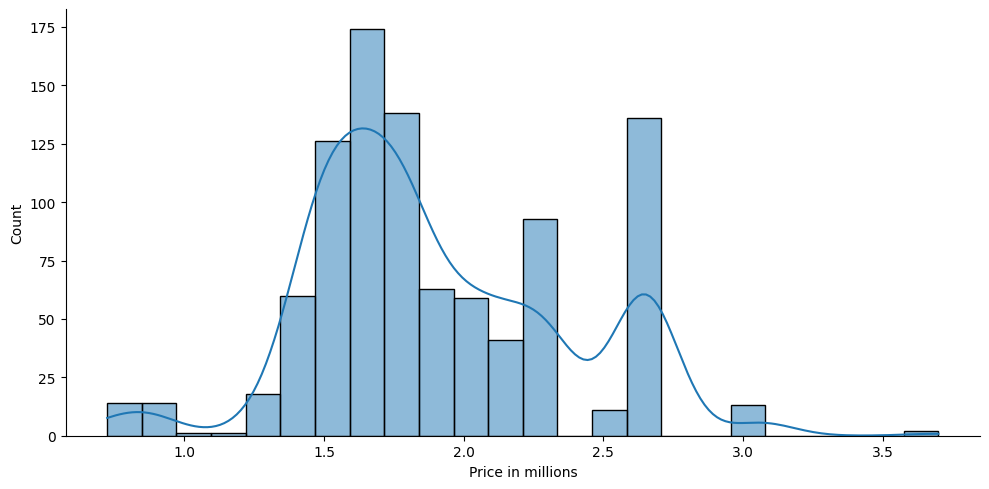

In [12]:
fig = sns.displot(np.log10(clear_df['Price']), kde=True, aspect=2)
fig.set(xlabel='Price in millions')

1.0


# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [13]:
#type(clear_df['Location'].astype(str).str.split(', ').iloc[12][-1])

clear_country = [clear_df['Location'].astype(str).str.split(', ').iloc[i][-1] for i in range(0,clear_df.shape[0])]
# NOT FROM CLEAR_DF, BECAUSE WE DELETED ALL NAN PRICES AND THERE IS NO RUSSIA (USSR) THEN
country = [df_data['Location'].astype(str).str.split(', ').iloc[i][-1] for i in range(0,df_data.shape[0])]

corrected_country1 = ['Russian Federation' if x == 'Russia' or x == 'Barents Sea' else x for x in country]
corrected_country2 = ['USA' if x == 'New Mexico' or x == 'Pacific Missile Range Facility' or x == 'Gran Canaria' else x for x in corrected_country1]
corrected_country3 = ['China' if x == 'Yellow Sea' else x for x in corrected_country2]
corrected_country4 = ["Korea, Democratic People's Republic of" if x == 'North Korea' else x for x in corrected_country3]
corrected_country5 = ['Korea, Republic of' if x == 'South Korea' else x for x in corrected_country4]
corrected_country = ['Iran, Islamic Republic of' if x == 'Shahrud Missile Test Site' or x == 'Iran' else x for x in corrected_country5]

codes = [countries.get(crt).alpha3 if crt != "Pacific Ocean" else 'NaN' for crt in corrected_country]

updated_df = df_data
updated_df['country'] = corrected_country

clear_df['country'] = clear_country

updated_df['CODE'] = codes

<ipython-input-13-ad959d26cb52>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
total_launches = updated_df.groupby(['country', 'CODE'], as_index=False).agg({'country': pd.Series.count})
total_launches

,CODE,country
0,AUS,6
1,BRA,3
2,CHN,269
3,FRA,303
4,IND,76
5,IRN,14
6,ISR,11
7,JPN,126
8,KAZ,701
9,KEN,9


In [15]:
fig = px.choropleth(total_launches, locations='CODE', color='country',
                           color_continuous_scale="speed",
                           range_color=(0, 500),
                           labels={'country':'total number of launches'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [16]:
failed_launches = updated_df.where(updated_df['Mission_Status'] != 'Success').value_counts('CODE')
failed_launches

,count
CODE,
USA,163
KAZ,93
RUS,93
CHN,25
FRA,18
IND,13
JPN,13
IRN,9
AUS,3


In [17]:
fig = px.choropleth(failed_launches, locations=failed_launches.index, color=failed_launches.values,
                           color_continuous_scale="speed",
                           range_color=(0,28)
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [18]:
data = updated_df.groupby(['country', 'Organisation', 'Mission_Status'], as_index=False).agg({'Price': pd.Series.count})
data.head()

,country,Organisation,Mission_Status,Price
0,Australia,AMBA,Success,0
1,Australia,CECLES,Failure,0
2,Australia,CECLES,Success,0
3,Australia,RAE,Failure,0
4,Australia,RAE,Success,0


In [19]:
fig = px.sunburst(data, path=['country', 'Organisation', 'Mission_Status'], names='Mission_Status', values='Price')
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [20]:
org_data = clear_df.groupby(['country','Organisation']).agg({'Price': pd.Series.sum, 'Mission_Status': pd.Series.count})
org_data

Price  Mission_Status
country                        Organisation                             
China                          CASC             6,334.96             157
                               ExPace              28.30               1
France                         Arianespace     16,248.00              94
                               ESA                 37.00               1
Gran Canaria                   Northrop            80.00               2
India                          ISRO             2,177.00              67
Japan                          JAXA               168.00               3
                               MHI              3,532.50              37
Kazakhstan                     Arianespace         97.00               2
                               ILS                325.00               5
                               Kosmotras          348.00              12
                               RVSN USSR       10,000.00               2
                               Roscosmos        1,055.50              20
                               VKS RF             325.00               5
New Zealand                    Rocket Lab          97.50              13
Pacific Missile Range Facility Sandia              15.00               1
Russia                         Eurockot           543.40              13
                               Kosmotras          290.00              10
                               Roscosmos          132.00               3
                               VKS RF           1,223.90              28
USA                            Boeing           1,241.00               7
                               EER                 20.00               1
                               ILS                995.00               8
                               Lockheed           280.00               8
                               Martin Marietta    721.40               9
                               NASA            76,280.00             149
                               Northrop         3,850.00              81
                               SpaceX           5,444.00              99
                               ULA             14,798.00              98
                               US Air Force     1,550.92              26
                               Virgin Orbit        12.00               1
Yellow Sea                     CASC                 5.30               1

# Analyse the Amount of Money Spent by Organisation per Launch

In [21]:
org_data['per_launch'] = org_data['Price']/org_data['Mission_Status']
org_data

Price  Mission_Status  \
country                        Organisation                                
China                          CASC             6,334.96             157   
                               ExPace              28.30               1   
France                         Arianespace     16,248.00              94   
                               ESA                 37.00               1   
Gran Canaria                   Northrop            80.00               2   
India                          ISRO             2,177.00              67   
Japan                          JAXA               168.00               3   
                               MHI              3,532.50              37   
Kazakhstan                     Arianespace         97.00               2   
                               ILS                325.00               5   
                               Kosmotras          348.00              12   
                               RVSN USSR       10,000.00               2   
                               Roscosmos        1,055.50              20   
                               VKS RF             325.00               5   
New Zealand                    Rocket Lab          97.50              13   
Pacific Missile Range Facility Sandia              15.00               1   
Russia                         Eurockot           543.40              13   
                               Kosmotras          290.00              10   
                               Roscosmos          132.00               3   
                               VKS RF           1,223.90              28   
USA                            Boeing           1,241.00               7   
                               EER                 20.00               1   
                               ILS                995.00               8   
                               Lockheed           280.00               8   
                               Martin Marietta    721.40               9   
                               NASA            76,280.00             149   
                               Northrop         3,850.00              81   
                               SpaceX           5,444.00              99   
                               ULA             14,798.00              98   
                               US Air Force     1,550.92              26   
                               Virgin Orbit        12.00               1   
Yellow Sea                     CASC                 5.30               1   

                                                per_launch  
country                        Organisation                 
China                          CASC                  40.35  
                               ExPace                28.30  
France                         Arianespace          172.85  
                               ESA                   37.00  
Gran Canaria                   Northrop              40.00  
India                          ISRO                  32.49  
Japan                          JAXA                  56.00  
                               MHI                   95.47  
Kazakhstan                     Arianespace           48.50  
                               ILS                   65.00  
                               Kosmotras             29.00  
                               RVSN USSR          5,000.00  
                               Roscosmos             52.77  
                               VKS RF                65.00  
New Zealand                    Rocket Lab             7.50  
Pacific Missile Range Facility Sandia                15.00  
Russia                         Eurockot              41.80  
                               Kosmotras             29.00  
                               Roscosmos             44.00  
                               VKS RF                43.71  
USA                            Boeing               177.29  
                               EER                   20.00  
  

# Chart the Number of Launches per Year

In [460]:
updated_df.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China


In [22]:
years = [date.replace(' UTC','')[4:] for date in updated_df['Date'].values]
updated_df['Date'] = pd.to_datetime(years, format='mixed')
updated_df.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country,CODE
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,KAZ
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA


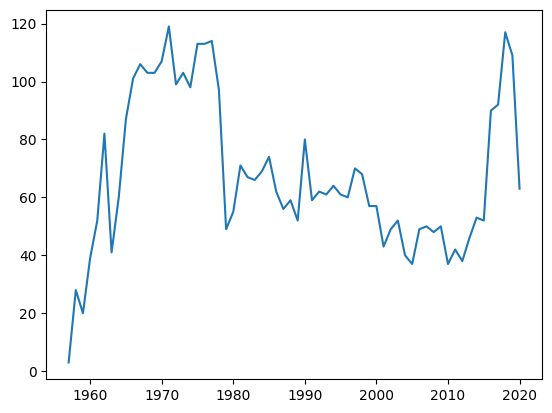

In [23]:
years = [date.year for date in updated_df['Date']]
year_df = pd.DataFrame(years, columns=['Year']).value_counts('Year')
# px.bar(year_df)
year_df.sort_index(inplace=True)
# year_df
plt.plot(year_df)

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [24]:
# dataframe with dates and counting values of launches
months = [pd.to_datetime(f'{date.year}-{date.month}') for date in updated_df['Date']]
months_df = pd.DataFrame(months, columns=['year-month']).value_counts('year-month')
months_df.sort_index(inplace=True)

# dataframe with all months
dates = pd.DataFrame(pd.date_range(start='1964-09-01', end='2020-08-01', freq='MS'), columns=['Date'])
dates['number'] = 0

# pivoting, so dates are also indexes
daates = dates.pivot(index='Date', columns='number')
daates['number'] = 0

# putting values from months
for i in range(0, months_df.shape[0]):
  daates[daates.index == months_df.index[i]] = months_df.iloc[i]

daates





,number
number,
Date,
1964-09-01,6
1964-10-01,8
1964-11-01,3
1964-12-01,5
1965-01-01,5
...,...
2020-04-01,5
2020-05-01,9


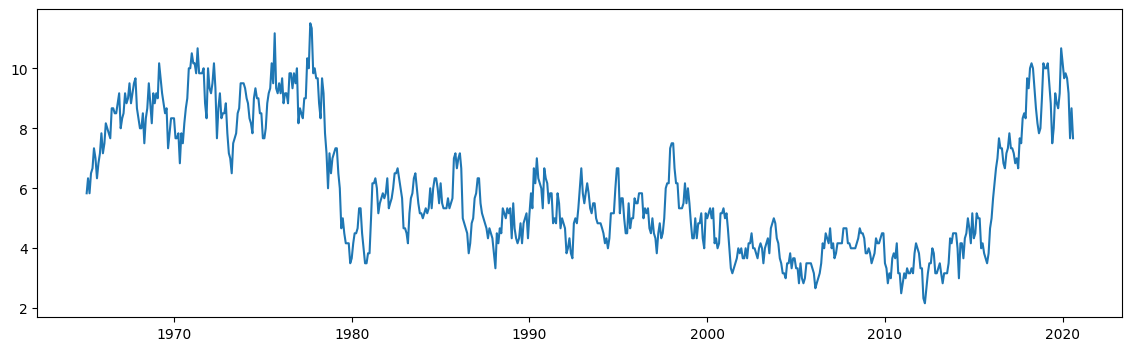

In [25]:
roll_df = daates.rolling(window=6).mean()

plt.figure(figsize=(14,4))
fig = plt.plot(roll_df)

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [26]:
df_list = {i: months_df[months_df.index.month == i].sum() for i in range(1,13)}
df_list

{1: 268,
 2: 336,
 3: 353,
 4: 383,
 5: 326,
 6: 402,
 7: 351,
 8: 373,
 9: 365,
 10: 381,
 11: 336,
 12: 450}

In [27]:
launch_per_month = pd.DataFrame(df_list, index=['total']).transpose()
px.bar(launch_per_month)

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [28]:
updated_df['Date-month'] = months

clear_df = updated_df.dropna()
clear_df['Price'] = clear_df['Price'].astype(str).str.replace(',', '')
clear_df['Price'] = pd.to_numeric(clear_df['Price'])

updated_df.head()

<ipython-input-28-48ba178c9b0a>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-28-48ba178c9b0a>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country,CODE,Date-month
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,2020-08-01
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,2020-08-01
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,2020-08-01
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,KAZ,2020-07-01
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,2020-07-01


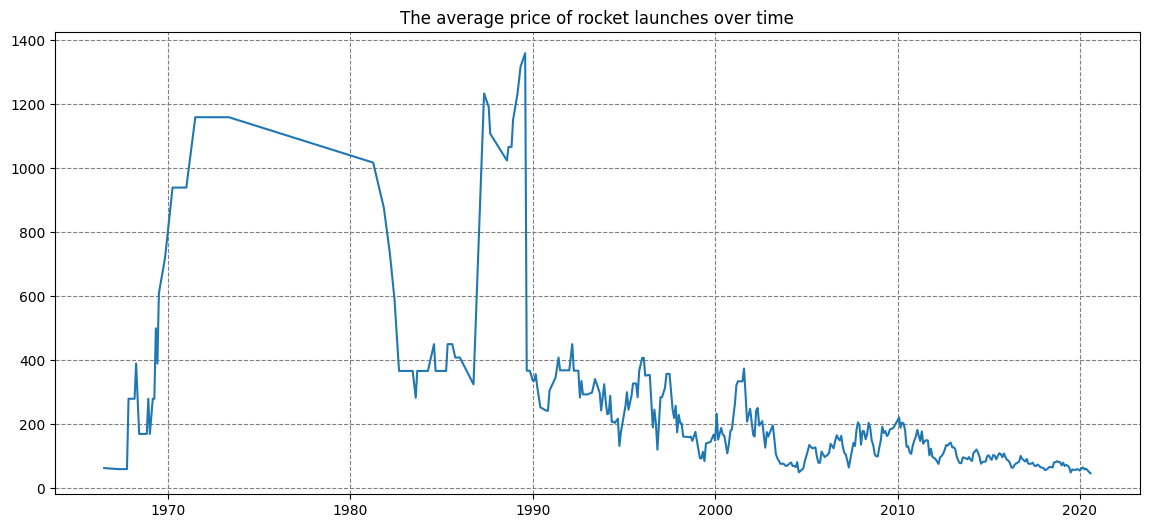

In [29]:
avg_df = clear_df.groupby('Date-month').agg({'Price': pd.Series.mean}).rolling(window=5).mean()

plt.figure(figsize=(14,6))
plt.title('The average price of rocket launches over time')
plt.grid(color='grey', linestyle='--')

plt.plot(avg_df)

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [30]:
top_10 = list(updated_df.value_counts('Organisation')[0:10].index)

['RVSN USSR', 'Arianespace', 'General Dynamics', 'CASC', 'NASA', 'VKS RF', 'US Air Force', 'ULA', 'Boeing', 'Martin Marietta']


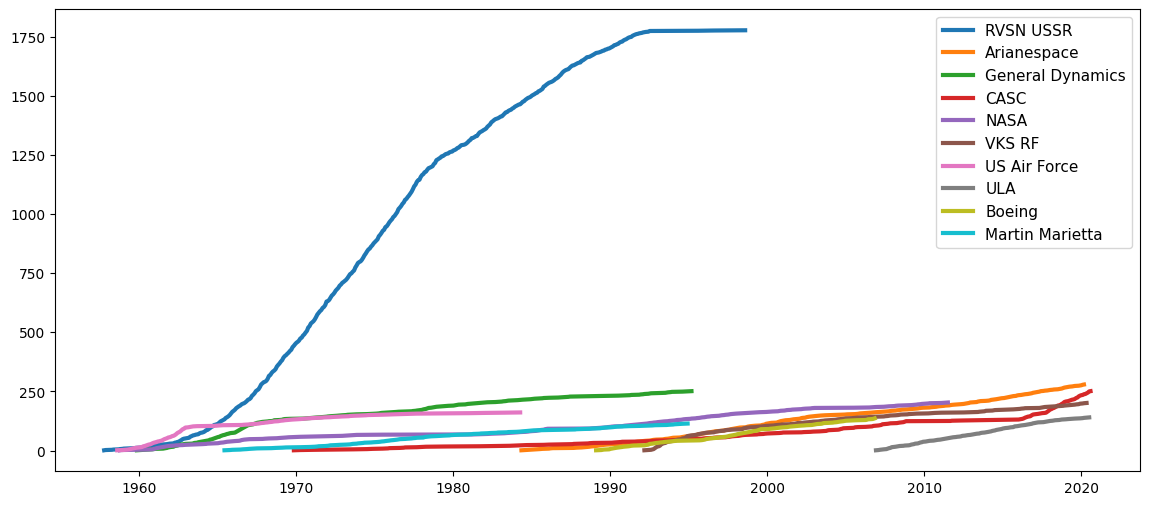

In [31]:
plt.figure(figsize=(14,6))

for org in top_10:
  find = updated_df[updated_df['Organisation'] == org].sort_values('Date-month')
  running_sum = find.groupby(['Date-month']).agg({'Mission_Status': pd.Series.count}).agg({'Mission_Status': pd.Series.cumsum})
  plt.plot(running_sum.index, running_sum.values, linewidth=3, label=org)
  plt.legend(fontsize=11)


print(top_10)

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [32]:
#take updated_df dataframe AFTER making "Date-month" column.
cold_war_df = updated_df[updated_df['Date-month'] < '1992']
cold_war_df['country'] = ['Russian Federation' if x == 'Kazakhstan' else x for x in cold_war_df['country']]
cold_war_df = cold_war_df[cold_war_df['country'].isin(['USA', 'Russian Federation'])]
cold_war_df

<ipython-input-32-a11f3010a0c7>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country,CODE,Date-month
1718,1718,1718,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan",1991-12-20 00:00:00,Rokot/Briz K | GVM Demo Flight,StatusRetired,NaN,Success,Russian Federation,KAZ,1991-12-01
1719,1719,1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-12-18 03:54:00,Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,NaN,Success,Russian Federation,RUS,1991-12-01
1721,1721,1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA",1991-12-07 22:47:00,Atlas II | Eutelsat 2F3,StatusRetired,NaN,Success,USA,USA,1991-12-01
1722,1722,1722,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA",1991-11-28 13:23:00,Atlas-E/F Star-37S-ISS | DMSP F-11,StatusRetired,NaN,Success,USA,USA,1991-11-01
1723,1723,1723,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia",1991-11-27 03:30:00,Cosmos-3M (11K65M) | Cosmos 2173,StatusRetired,NaN,Success,Russian Federation,RUS,1991-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA,1958-02-01
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA,1958-02-01
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA,1957-12-01
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Russian Federation,KAZ,1957-11-01


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [33]:
ussr_usa = cold_war_df.value_counts('country')

In [34]:
px.pie(labels=ussr_usa.index, values=ussr_usa, names=ussr_usa.index)

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [35]:
#cold_war_df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)
cold_war_df['year'] = [date.year for date in cold_war_df['Date-month']]
group = cold_war_df.groupby(['country','year']).agg({'Detail': pd.Series.count})

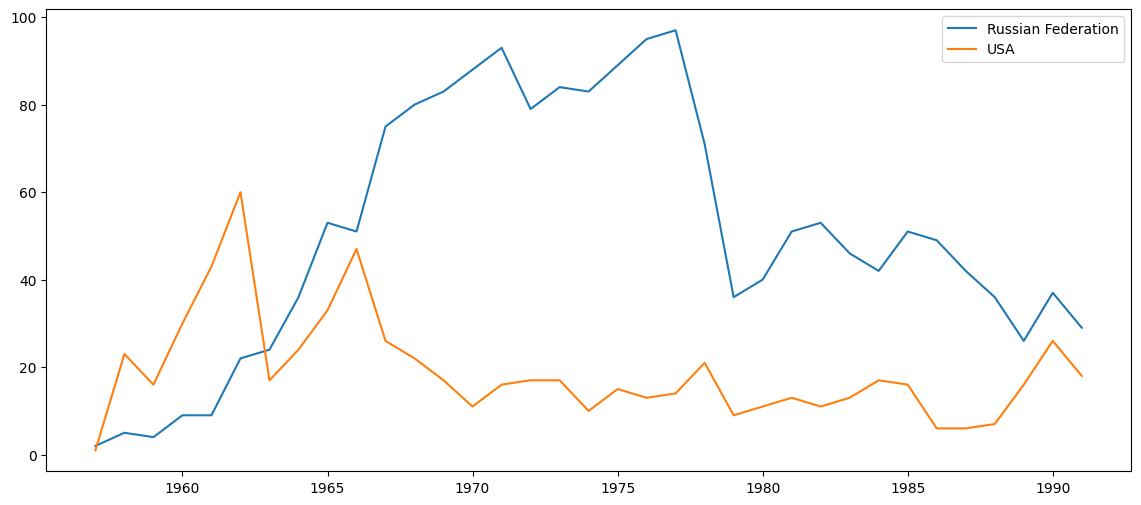

In [36]:
plt.figure(figsize = (14,6))

plt.plot(group.loc['Russian Federation'], label='Russian Federation')
plt.plot(group.loc['USA'], label='USA')
plt.legend()

## Chart the Total Number of Mission Failures Year on Year.

In [37]:
total_fail = cold_war_df[cold_war_df['Mission_Status'] != 'Success'].groupby(['country', 'year']).agg({'Detail': pd.Series.count})
total_fail

Detail
country            year        
Russian Federation 1958       4
                   1959       2
                   1960       6
                   1961       4
                   1962       7
...                         ...
USA                1986       2
                   1987       1
                   1988       1
                   1990       1
                   1991       2

[61 rows x 1 columns]

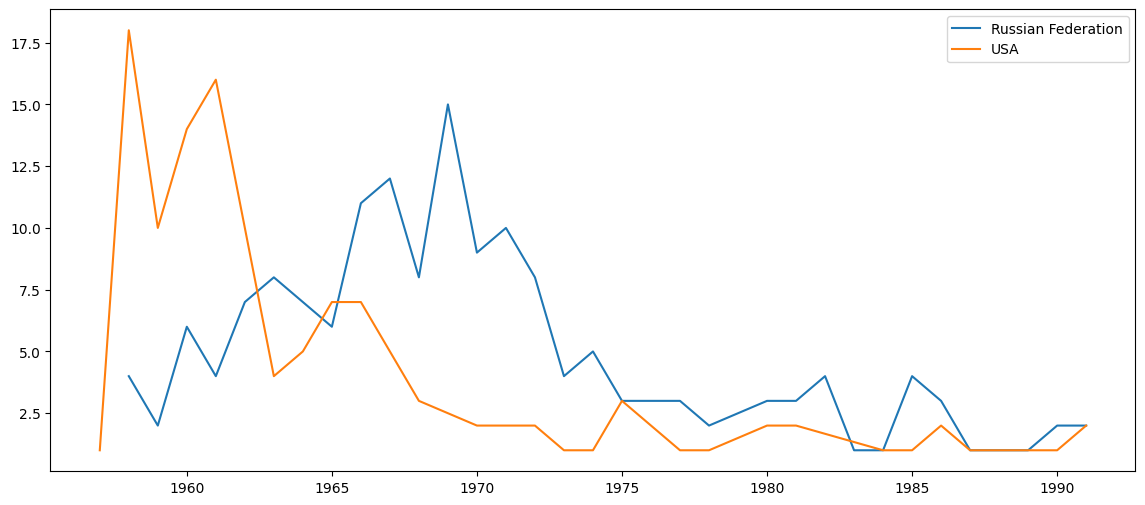

In [38]:
plt.figure(figsize = (14,6))

plt.plot(total_fail.loc['Russian Federation'], label='Russian Federation')
plt.plot(total_fail.loc['USA'], label='USA')
plt.legend()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [39]:
total = cold_war_df.groupby(['country', 'year']).agg({'Detail': pd.Series.count})
perc_fail = total_fail/total
perc_fail.fillna(0, inplace=True)

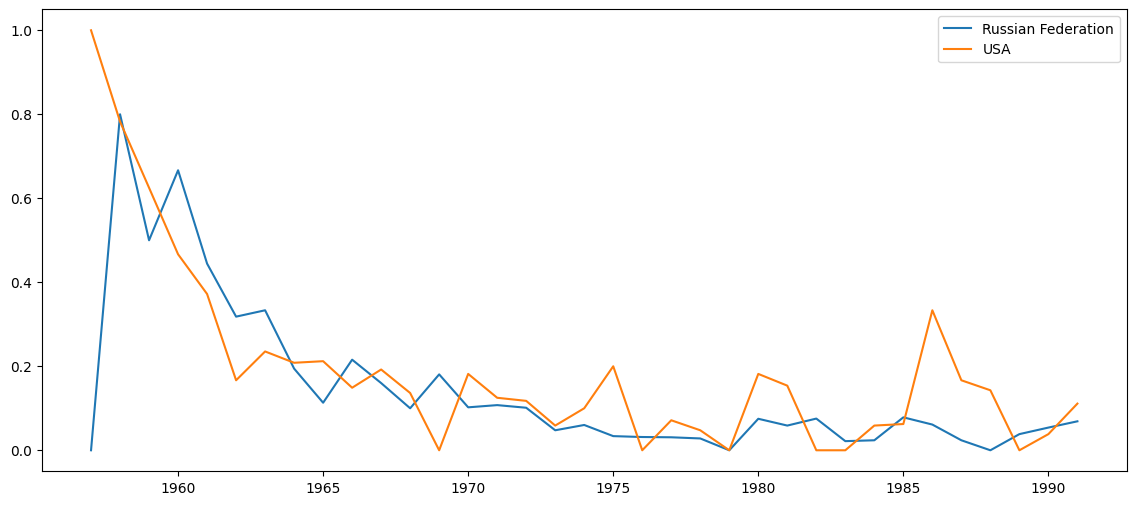

In [40]:
plt.figure(figsize = (14,6))

plt.plot(perc_fail.loc['Russian Federation'], label='Russian Federation')
plt.plot(perc_fail.loc['USA'], label='USA')
plt.legend()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [61]:
up_to_2020 = updated_df[updated_df['Date-month'] <= pd.to_datetime('2021')]
up_to_2020.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)
up_to_2020['year'] = [date.year for date in up_to_2020['Date-month']]
group = up_to_2020.groupby(['country','year']).agg({'Detail': pd.Series.count})

group.reset_index(level=['country','year'], inplace=True)

group_max = group.loc[group.groupby('year')['Detail'].idxmax()]

group_max.groupby(['country', 'year']).agg({'Detail': pd.Series.count})

Detail
country    year        
China      2018       1
           2019       1
           2020       1
Kazakhstan 1957       1
           1964       1
...                 ...
USA        2013       1
           2014       1
           2015       1
           2016       1
           2017       1

[64 rows x 1 columns]

In [69]:
px.sunburst(group_max.groupby(['country', 'year'], as_index=False).agg({'Detail': pd.Series.count}), path=['country', 'year'], names='year', values='Detail')

In [77]:
succ_up_to_2020 = updated_df[(updated_df['Date-month'] <= pd.to_datetime('2021')) & (updated_df['Mission_Status'] == "Success")]
succ_up_to_2020.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)
succ_up_to_2020['year'] = [date.year for date in succ_up_to_2020['Date-month']]
succ_group = succ_up_to_2020.groupby(['country','year']).agg({'Detail': pd.Series.count})

succ_group.reset_index(level=['country','year'], inplace=True)

succ_group_max = succ_group.loc[succ_group.groupby('year')['Detail'].idxmax()]

succ_group_max.groupby(['country', 'year']).agg({'Detail': pd.Series.count})

<ipython-input-77-21cbc7549325>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-77-21cbc7549325>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Detail
country    year        
China      2018       1
           2019       1
Kazakhstan 1957       1
           1964       1
           1965       1
...                 ...
USA        2014       1
           2015       1
           2016       1
           2017       1
           2020       1

[64 rows x 1 columns]

In [78]:
px.sunburst(succ_group_max.groupby(['country', 'year'], as_index=False).agg({'Detail': pd.Series.count}), path=['country', 'year'], names='year', values='Detail')

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [92]:
#updated_df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)
updated_df['year'] = [date.year for date in updated_df['Date-month']]
group = updated_df.groupby(['Organisation', 'year']).agg(Launches=('Detail', 'count')).reset_index()

top_org = group.loc[group.groupby('year')['Launches'].idxmax()]

px.sunburst(top_org, path=['Organisation', 'year'], names='year', values='Launches')